In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import itertools
from astropy.convolution import Gaussian2DKernel
from astropy.visualization import MinMaxInterval,SqrtStretch,AsinhStretch
from astropy.visualization.mpl_normalize import ImageNormalize
from astropy.visualization import make_lupton_rgb
sys.path.append('/Users/liruancun/Works/GitHub/')
from MorphSED.morphsed import Galaxy

## A galaxy object 

In [8]:
# with a given stellar mass
Mygalaxy = Galaxy(mass = 1e10)

## define the strucute imformation of the two subcomponent

In [9]:
#just usual dictionary 
names  = ['%s_%s' % (profile, prop) for prop,profile in itertools.product(('xcen','ycen','mag','re','nser','ang','axrat','box'), ('sersic1','sersic2'))]
model0 = np.array((50, 50, 50, 50, 30., 70., 10, 35, 3.0, 1.0, 180/np.pi-90, 180/np.pi-90, 1.,    0.5, 0,     0))
tofit  = np.array((True,  False, True,  False, True,  True,  True, True, True, False, True,  True,  True, True,  False,  False))
params = np.array(model0[tofit])
allparams = model0.copy()
fields = ['xcen','ycen','frac','re','nser','ang','axrat','box']
s1params = [x for i,x in enumerate(allparams) if i%2 == 0]
s2params = [x for i,x in enumerate(allparams) if i%2 != 0]
fields.append('convolve')
s1params.append(False)
s2params.append(False)
sparams = [{name: val for name, val in zip(fields, params)} for params in (s1params, s2params)]
print (sparams[0])
print (sparams[1])

{'xcen': 50.0, 'ycen': 50.0, 'frac': 30.0, 're': 10.0, 'nser': 3.0, 'ang': -32.70422048691768, 'axrat': 1.0, 'box': 0.0, 'convolve': False}
{'xcen': 50.0, 'ycen': 50.0, 'frac': 70.0, 're': 35.0, 'nser': 1.0, 'ang': -32.70422048691768, 'axrat': 0.5, 'box': 0.0, 'convolve': False}


### now add the above subcomponent

In [10]:
age = {'type': "linear", 'paradic':{'k':-0.05, 'b':9.}}
Z = {'type': "linear", 'paradic':{'k':0., 'b':0.02}}
Mygalaxy.add_subC('sersic',sparams[0],age,Z)
age = {'type': "linear", 'paradic':{'k':0., 'b':0.1}}
Z = {'type': "linear", 'paradic':{'k':0., 'b':0.05}}
Mygalaxy.add_subC('sersic',sparams[1],age,Z)

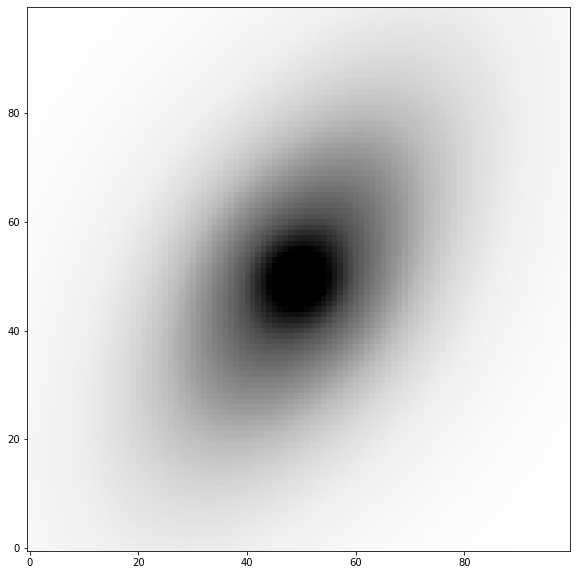

In [11]:
psfFWHM=1.44
psf = Gaussian2DKernel(psfFWHM, x_size=15, y_size=15)
psf.normalize()
totalmass = Mygalaxy.generate_mass_map((100,100),np.array(psf))
sky_mean=np.mean(totalmass)
sky_median=np.median(totalmass) 
sky_std = np.std(totalmass)
fig=plt.figure(figsize=(10,10))
norm=ImageNormalize(vmin=0.,vmax=(sky_median+4*sky_std),stretch=AsinhStretch())
plt.imshow(totalmass, cmap='Greys', origin='lower', norm=norm)
plt.show()

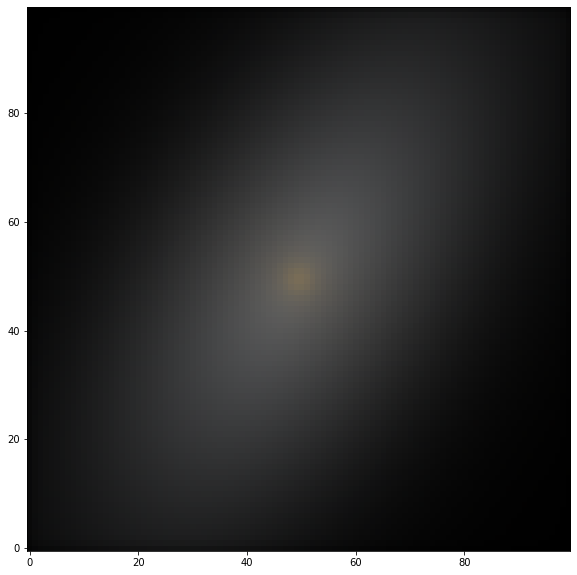

In [12]:
psfFWHM=1.44
kernel = Gaussian2DKernel(psfFWHM, x_size=15, y_size=15)
kernel.normalize()
image_u = Mygalaxy.generate_image('sloan_u',np.array(kernel))
image_r = Mygalaxy.generate_image('sloan_r',np.array(kernel))
image_z = Mygalaxy.generate_image('sloan_z',np.array(kernel))
fac1 = 10000./np.sum(image_u)
fac2 = 10000./np.sum(image_r)
fac3 = 10000./np.sum(image_z)
norm_u = image_u*fac1
norm_r = image_r*fac2
norm_z = image_z*fac3
image = make_lupton_rgb(norm_z, norm_r, norm_u, Q=10)
fig=plt.figure(figsize=(10,10))
plt.imshow(image,origin='lower')
plt.show()

In [14]:
np.sum(image_u)

0.0